In [56]:
#Atom-EDA-Clustering-Labeling-UnSupervised

from __future__ import print_function
import datetime
print(datetime.datetime.now())
import http.server
import urllib.parse
from urllib.parse import urlparse
import matplotlib
import datetime
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
import urllib
from urllib.request import urlretrieve
import time
import pyodbc
import sys
from shutil import copyfile
import concurrent.futures
import os
import gc


print("OK")


2020-03-30 02:13:39.396034
OK


In [101]:
DBSTRING = DBSTRING = "DRIVER={SQL Server};Server=LAPTOP-Q26NOFQQ\ATOMLOCALDB;Trusted_Connection=yes;Persist Security Info=false;Integrated Security=sspi;connection timeout=60;database=AtomLocalDB;"
print(DBSTRING)
connection = pyodbc.connect(DBSTRING)

#stmt="select timeateventopen, dbo.atom_get_value_buckets(Relation_Intraday_HighLowRange) Relation_Intraday_HighLowRange from Atom_AI_Candle_Observations_For_RL where InstrumentKey = 'BANKNIFTY' and  convert(time,timeateventopen) = convert(time,'15:15:00') order by TimeAtEventOpen"
stmt="select timeateventopen, Relation_Intraday_HighLowRange from Atom_AI_Candle_Observations_For_RL where InstrumentKey = 'BANKNIFTY' and  convert(time,timeateventopen) = convert(time,'15:15:00') order by Relation_Intraday_HighLowRange"

print(stmt)
#print(datetime.datetime.now())
df = pd.read_sql(stmt, connection)
print(df.columns)

df.describe()

df['New_ID'] = range(1, 1+len(df))

df.head()




DRIVER={SQL Server};Server=LAPTOP-Q26NOFQQ\ATOMLOCALDB;Trusted_Connection=yes;Persist Security Info=false;Integrated Security=sspi;connection timeout=60;database=AtomLocalDB;
select timeateventopen, Relation_Intraday_HighLowRange from Atom_AI_Candle_Observations_For_RL where InstrumentKey = 'BANKNIFTY' and  convert(time,timeateventopen) = convert(time,'15:15:00') order by Relation_Intraday_HighLowRange
Index(['timeateventopen', 'Relation_Intraday_HighLowRange'], dtype='object')


,timeateventopen,Relation_Intraday_HighLowRange,New_ID
0,2017-09-20 15:15:00,0.301,1
1,2017-10-10 15:15:00,0.329,2
2,2017-09-19 15:15:00,0.342,3
3,2017-12-26 15:15:00,0.344,4
4,2019-12-24 15:15:00,0.347,5


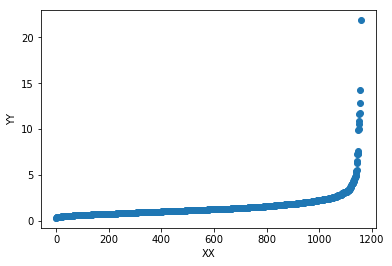

In [102]:
fig, ax = plt.subplots()
#size_scaler = 300 # Your points will be too small if you just use sd
ax.scatter(np.arange(len(df['timeateventopen'])), df['Relation_Intraday_HighLowRange'], marker='o')
#ax.xaxis.set_ticks(np.arange(len(df['timeateventopen'])))
#ax.xaxis.set_ticklabels(df['timeateventopen'], rotation=90)
plt.xlabel("XX")
plt.ylabel("YY")

plt.show()


In [103]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

X = np.array(df["Relation_Intraday_HighLowRange"]).reshape(-1,1)
clustering = DBSCAN().fit_predict(X)

kmeansInfo = KMeans().fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[ 0.72485323]
 [11.463625  ]
 [ 1.90154976]
 [ 4.34065385]
 [21.857     ]
 [ 1.25179657]
 [ 2.75126316]
 [ 7.043     ]]


IndexError: index 1 is out of bounds for axis 1 with size 1

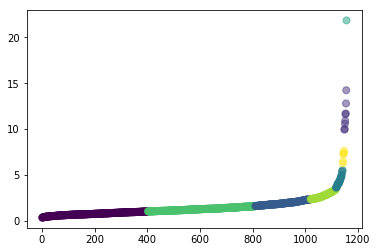

In [104]:
print(kmeansInfo)
centroids = kmeansInfo.cluster_centers_
print(centroids)

plt.scatter(df['New_ID'], df['Relation_Intraday_HighLowRange'], c= kmeansInfo.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [107]:


#print(X)
#print(len(X))

Y=np.array(kmeansInfo.labels_)

df["cluster_labels"] = kmeansInfo.labels_

df.sort_values(by=['Relation_Intraday_HighLowRange'])

for index, val in df.iterrows():
    print("Value=%f, Cluster=%d" %(val['Relation_Intraday_HighLowRange'],val['cluster_labels']))
    #print("Value=%f, Cluster=%f" %(val,centroids[ctr]))
    
#df.head()

#print(clustering.labels_)

#print(len(clustering))

Value=0.301000, Cluster=0
Value=0.329000, Cluster=0
Value=0.342000, Cluster=0
Value=0.344000, Cluster=0
Value=0.347000, Cluster=0
Value=0.363000, Cluster=0
Value=0.369000, Cluster=0
Value=0.373000, Cluster=0
Value=0.385000, Cluster=0
Value=0.386000, Cluster=0
Value=0.393000, Cluster=0
Value=0.401000, Cluster=0
Value=0.409000, Cluster=0
Value=0.409000, Cluster=0
Value=0.409000, Cluster=0
Value=0.411000, Cluster=0
Value=0.424000, Cluster=0
Value=0.424000, Cluster=0
Value=0.425000, Cluster=0
Value=0.427000, Cluster=0
Value=0.427000, Cluster=0
Value=0.429000, Cluster=0
Value=0.445000, Cluster=0
Value=0.446000, Cluster=0
Value=0.447000, Cluster=0
Value=0.455000, Cluster=0
Value=0.457000, Cluster=0
Value=0.460000, Cluster=0
Value=0.465000, Cluster=0
Value=0.468000, Cluster=0
Value=0.469000, Cluster=0
Value=0.470000, Cluster=0
Value=0.475000, Cluster=0
Value=0.477000, Cluster=0
Value=0.481000, Cluster=0
Value=0.484000, Cluster=0
Value=0.486000, Cluster=0
Value=0.486000, Cluster=0
Value=0.4860

Value=3.272000, Cluster=6
Value=3.300000, Cluster=6
Value=3.309000, Cluster=6
Value=3.313000, Cluster=6
Value=3.328000, Cluster=6
Value=3.339000, Cluster=6
Value=3.343000, Cluster=6
Value=3.383000, Cluster=6
Value=3.466000, Cluster=6
Value=3.598000, Cluster=3
Value=3.611000, Cluster=3
Value=3.628000, Cluster=3
Value=3.664000, Cluster=3
Value=3.736000, Cluster=3
Value=3.895000, Cluster=3
Value=3.999000, Cluster=3
Value=4.019000, Cluster=3
Value=4.030000, Cluster=3
Value=4.035000, Cluster=3
Value=4.054000, Cluster=3
Value=4.059000, Cluster=3
Value=4.150000, Cluster=3
Value=4.332000, Cluster=3
Value=4.368000, Cluster=3
Value=4.369000, Cluster=3
Value=4.411000, Cluster=3
Value=4.568000, Cluster=3
Value=4.696000, Cluster=3
Value=4.746000, Cluster=3
Value=4.747000, Cluster=3
Value=4.914000, Cluster=3
Value=5.014000, Cluster=3
Value=5.315000, Cluster=3
Value=5.399000, Cluster=3
Value=5.500000, Cluster=3
Value=6.248000, Cluster=7
Value=6.466000, Cluster=7
Value=7.253000, Cluster=7
Value=7.3180